In [ ]:
pip install spotipy lyricsgenius

In [5]:
import pandas as pd

In [4]:
data = pd.read_csv('./training-data.tsv')
data

,pop\thold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel
0,pop\tbelieve drop rain fall grow believe darke...
1,pop\tsweetheart send letter goodbye secret fee...
2,pop\tkiss lips want stroll charm mambo chacha ...
3,pop\ttill darling till matter know till dream ...
4,pop\tconvoy light dead ahead merchantmen trump...
...,...
28338,hip hop\tfabolous hahahaha yeah ghetto superst...
28339,hip hop\theroes tryna glock straight work nigg...
28340,hip hop\tsit eazy believe alright eazy tell li...
28341,hip hop\tknow right clear streets come track n...


In [6]:
import spotipy
import lyricsgenius
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="57145e04c4e34b998712d9eede6aaf7d",
                                                           client_secret="0c20611c261b4c16b407f954d53ea48e"))

results = sp.search(q='drake', limit=3)
for idx, track in enumerate(results['tracks']['items']):
    print(idx, track['name'])

In [7]:
genius = lyricsgenius.Genius("wJRVTKvwP6Co2RwJEfiVvox_QcoPEm23z3hst8BOfHPa9qkF4Fuj6jQuRfsI5_rn")
artist = genius.search_artist("drake", max_songs=3, sort="title")
print(artist.songs)

Searching for songs by drake...

Changing artist name to 'Drake'
Song 1: "0 to 100 / The Catch Up"
Song 2: "10 Bands"
Song 3: "1Xtra Freestyle"

Reached user-specified song limit (3).
Done. Found 3 songs.
[Song(id, artist, ...), Song(id, artist, ...), Song(id, artist, ...)]


In [8]:
songs = ["Marvin's Room"]
artists = ["Drake"]
genres = ["Pop"]

song = genius.search_song("Marvin's Room", artist.name)
print(song.lyrics)

Searching for "Marvin's Room" by Drake...
Done.
Marvin’s Room Lyrics[Intro: Ericka Lee]
Hello?
Yeah, I just walked in
Yeah, I'm good, you still working?
Tonight, right now?
Did I go out? Yeah, I went out, I went
I went to a couple of clubs
I never went to bed, shit
Wine or water?
Did you say something about a cold drink? I don't know
I'm delirious

[Verse 1: Drake]
Cups of the rosé
Bitches in my old phone
I should call one and go home
I've been in this club too long
The woman that I would try
Is happy with a good guy
But I've been drinkin' so much
That I'ma call her anyway and say
[Chorus: Drake]
Fuck that nigga that you love so bad
I know you still think about the times we had
I say fuck that nigga that you think you found
And since you pick up, I know he's not around, oh, oh
[Post-Chorus: Drake & Ericka Lee]
Are you drunk right now?
I'm just sayin' you could do better
Tell me, have you heard that lately?
I'm just sayin' you could do better
And I'll start hatin' only if you make me

[

stuff added by bing below

In [13]:
import csv

csvfile = open('tcc_ceds_music.csv', newline='', encoding='utf-8')
reader = csv.reader(csvfile, delimiter=',')
i = 0
for row in reader:
  genre = row[4]
  lyrics = row[5]
  # print(genre, lyrics)
  i += 1
  # if i == 5:
  #   break
print(i)

28373


In [45]:
import numpy as np
import sys
from collections import Counter, OrderedDict
import math
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from statistics import mean
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def generate_tuples_from_file(training_file_path):
  """
  Generates tuples from file formated like:
  id\ttext\tlabel
  Parameters:
    training_file_path - str path to file to read in
  Return:
    a list of tuples of strings formatted [(id, example_text, label), (id, example_text, label)....]
  """
    f = open(training_file_path, "r", encoding="utf8")
    listOfExamples = []
    for review in f:
        if len(review.strip()) == 0:
            continue
        dataInReview = review.split("\t")
        for i in range(len(dataInReview)):
      # remove any extraneous whitespace
            dataInReview[i] = dataInReview[i].strip()
        t = tuple(dataInReview)
        listOfExamples.append(t)
    f.close()
    return listOfExamples

In [9]:
def generate_tuples_from_file(training_file_path):
	"""
	Generates tuples from file formated like:
	id\ttext\tlabel
	Parameters:
		training_file_path - str path to file to read in
	Return:
		a list of tuples of strings formatted [(id, example_text, label), (id, example_text, label)....]
	"""
	f = open(training_file_path, "r", encoding="utf8")
	listOfExamples = []
	for review in f:
		if len(review.strip()) == 0:
			continue
		dataInReview = review.split("\t")
		for i in range(len(dataInReview)):
			# remove any extraneous whitespace
			dataInReview[i] = dataInReview[i].strip()
		t = tuple(dataInReview)
		listOfExamples.append(t)
	f.close()
	return listOfExamples

def precision(gold_labels, predicted_labels):
	"""
	Calculates the precision for a set of predicted labels give the gold (ground truth) labels.
	Parameters:
			gold_labels (list): a list of labels assigned by hand ("truth")
			predicted_labels (list): a corresponding list of labels predicted by the system
	Returns: double precision (a number from 0 to 1)
	"""
	den = 0
	num = 0
	for i in range(len(predicted_labels)):
		if predicted_labels[i] == '1':
			den += 1
			if gold_labels[i] == '1':
				num += 1
	if den == 0:
		return 0.0
	else:
		return float(num / den)



def recall(gold_labels, predicted_labels):
	"""
	Calculates the recall for a set of predicted labels give the gold (ground truth) labels.
	Parameters:
			gold_labels (list): a list of labels assigned by hand ("truth")
			predicted_labels (list): a corresponding list of labels predicted by the system
	Returns: double recall (a number from 0 to 1)
	"""
	den = 0
	num = 0
	for i in range(len(gold_labels)):
		if gold_labels[i] == '1':
			den += 1
			if predicted_labels[i] == '1':
				num += 1
	if den == 0:
		return 0.0
	else:
		return float(num / den)

def f1(gold_labels, predicted_labels):
	"""
	Calculates the f1 for a set of predicted labels give the gold (ground truth) labels.
	Parameters:
			gold_labels (list): a list of labels assigned by hand ("truth")
			predicted_labels (list): a corresponding list of labels predicted by the system
	Returns: double f1 (a number from 0 to 1)
	"""
	precision_score = precision(gold_labels, predicted_labels)
	recall_score = recall(gold_labels, predicted_labels)
	num = 2 * precision_score * recall_score
	den = precision_score + recall_score

	if den == 0:
		return 0.0
	else:
		return float(num / den)


def precision_multiclass_dict(gold_labels, classified_labels):
	# gold labels is a list of strings of the true labels
	# classified labels is a list of strings of the labels assigned by the classifier
	classes = set(gold_labels)
	class_precisions = Counter()
	for _class in classes:
		den = 0
		num = 0
		for i in range(len(classified_labels)):
			if classified_labels[i] == _class:
				den += 1
				if gold_labels[i] == _class:
					num += 1
		if den == 0:
			class_precisions[_class] = 0.0
		else:
			class_precisions[_class] = float(num / den)
	return class_precisions



def precision_multiclass(gold_labels, classified_labels):
	# gold labels is a list of strings of the true labels
	# classified labels is a list of strings of the labels assigned by the classifier
	precision_dict = precision_multiclass_dict(gold_labels, classified_labels)
	return float(mean(precision_dict.values()))


def recall_multi_dict(gold_labels, classified_labels):
	# gold labels is a list of strings of the true labels
	# classified labels is a list of strings of the labels assigned by the classifier
	classes = set(gold_labels)
	class_recalls = Counter()
	for _class in classes:
		den = 0
		num = 0
		for i in range(len(gold_labels)):
			if gold_labels[i] == _class:
				den += 1
				if classified_labels[i] == _class:
					num += 1
		if den == 0:
			class_precisions[_class] = 0.0
		else:
			class_recalls[_class] = float(num / den)
	return class_recalls



def recall_multi(gold_labels, classified_labels):
	# gold labels is a list of strings of the true labels
	# classified labels is a list of strings of the labels assigned by the classifier
	recall_dict = recall_multi_dict(gold_labels, classified_labels)
	return float(mean(recall_dict.values()))


def f1_multi(gold_labels, classified_labels):
	# gold labels is a list of strings of the true labels
	# classified labels is a list of strings of the labels assigned by the classifier
	precision_dict = precision_multiclass_dict(gold_labels, classified_labels)
	recall_dict = recall_multi_dict(gold_labels, classified_labels)

	classes = precision_dict.keys()

	f1_scores = []
	for _class in classes:
		class_precision = precision_dict[_class]
		class_recall = recall_dict[_class]
		if class_precision + class_recall == 0:
			f1_scores.append(0.0)
		else:
			f1_scores.append(float((2 * class_precision * class_recall) / (class_precision + class_recall)))

	return mean(f1_scores)


"""
Implement any other non-required functions here
"""

def preprocess_text(data):
	'''
	First, performs text normalization using the SnowballStemmer to perform stemming of all words in sentence after 
	tokenization is done (1).
	Removes all stop words from the sentence, except for 'not' (2).
	Pre-processes text by adding negation to all words that come after the not_words, before a punctuation, another not word,
	or end of sentence (3).
	Finally, removes punctuation from sentence tokens (3).  
	Parameters:
		data (str): sentence string 
	Returns: list - sentence tokens after preprocessing 

	'''
	# tokenization
	tokens = word_tokenize(data)

	# token stemming
	# sb = SnowballStemmer('english')
	# tokens = [sb.stem(w) for w in tokens]

	# Removing stopwords from token (other than not)
	_stopwords = stopwords.words("english")
	_stopwords.remove('not')
	tokens = [w for w in tokens if w.lower() not in _stopwords]

	# Negates all words after a not_word in the sentence tokens
	not_words = ['n\'t', 'not', 'no', 'never']
	tokens_len = len(tokens)
	for i in range(tokens_len):
		if tokens[i] in not_words:
			j = i + 1
			while (j < tokens_len and tokens[j] not in not_words and tokens[j].isalpha()):
				tokens[j] = 'NOT_{}'.format(tokens[j])
				j += 1
			i = j

	# Removes punctuation 
	punctuations = '''!()-[];:'"\,<>./?@#$%^&*_~'''
	tokens = [w for w in tokens if w not in punctuations]
	
	return tokens

def k_fold(all_examples, k):
	# all_examples is a list of tuples of strings formatted [(id, example_text, label), (id, example_text, label)....]
	# containing all examples from the train and dev sets
	# return a list of lists containing k sublists where each sublist is one "fold" in the given data

	examples_split = np.array_split(all_examples, k)
	# examples_split = [all_examples[i:i+k] for i in range(0, len(all_examples), k)]
	return examples_split

def perform_kfold(model, all_examples, k):
	'''
	Performs k-fold validation on a combined data set with the training and dev set. The model is trained and evaluated
	by training on k-1 folds and testing on the last fold. The precision, recall, and f1 score of each fold is printed 
	Parameter:
		model (TextClassify or TextClassifyImproved): model to use in k-fold experiments 
		all_examples (list of lists): combined training and dev sets 
		k (int): k paramater used for k-fold experiment 
	Returns: None
	'''
	examples_split = k_fold(all_examples, k)
	precisions = []
	recalls = []
	f1s = []
	for i in range(k):
		model.reset()
		exp = copy.deepcopy(examples_split)

		# Selects one of the k folds for the dev set
		dev = exp.pop(i)
		training = [item for sublist in exp for item in sublist]

		model.train(training)

		predicted_labels = []
		gold_labels = []
		for dev_review in dev:
			gold_labels.append(dev_review[2])
			prediction = model.classify(dev_review[1])
			predicted_labels.append(prediction)
		
		# Gets the precision, recall, and f1 for each of the k folds 
		precision_score = precision(gold_labels, predicted_labels)
		recall_score = recall(gold_labels, predicted_labels)
		f1_score = f1(gold_labels, predicted_labels)

		precisions.append(precision_score)
		recalls.append(recall_score)
		f1s.append(f1_score)

		print('K fold #{}'.format(i + 1))
		print('Precision score : {}'.format(precision_score))
		print('Recall score : {}'.format(recall_score))
		print('F1 score : {}'.format(f1_score))
		print('\n')
	
	print("Average precision score: {}".format(mean(precisions)))
	print("Average recall score: {}".format(mean(recalls)))
	print("Average f1 score: {}".format(mean(f1s)))


"""
implement your TextClassify class here
"""
class TextClassify:


	def __init__(self):
		self.reset()

	def reset(self):
		'''
		Essentially initializes a new model by resetting all training data
		'''
		self.vocab_set = set()
		self.class_words_lists = Counter()
		self.total_docs = 0
		self.class_count = Counter()

	def process_data(self, data):
		'''
		Processes the data - in the basic model, all that is needed is splitting the text
		Parameters:
			data (str): data to process
		Returns list - text split into seperate words 
		'''
		return data.split()
	
	def process_example(self, example):
		'''
		Processes the example string - in the basic model, all that is needed is splitting the text
		Parameters:
			example (str): example to process
		Returns list - text split into seperate words 
		'''
		return example.split()

	def train(self, examples):
		"""
		Trains the classifier based on the given examples
		Parameters:
			examples - a list of tuples of strings formatted [(id, example_text, label), (id, example_text, label)....]
		Return: None
		"""
		for review in examples:
			self.total_docs += 1

			label = review[0]
			if label not in self.class_count:
				self.class_count[label] = 1
			else:
				self.class_count[label] += 1

			text = self.process_example(review[1])
			self.vocab_set.update(set(text))
			if label not in self.class_words_lists:
				self.class_words_lists[label] = text
			else:
				self.class_words_lists[label].extend(text)


	def score(self, data):
		"""
		Score a given piece of text
		Parameters:
			data - str like "I loved the hotel"
		Return: dict of class: score mappings
		"""
		classes = self.class_count.keys()
		class_scores = Counter()

		text = self.process_data(data)

		for label in classes:
			prior = np.log(self.class_count[label] / self.total_docs)

			log_sum = 0
			for word in text:
				if word in self.vocab_set:
					word_class_count = self.class_words_lists[label].count(word) + 1
					class_total_word_count = len(self.class_words_lists[label]) + len(self.vocab_set)
					log_likelihood = np.log(word_class_count / class_total_word_count)
					log_sum += log_likelihood
			score = np.exp(prior + log_sum)
			class_scores[label] = score
		
		return class_scores


	def classify(self, data):
		"""
		Label a given piece of text
		Parameters:
			data - str like "I loved the hotel"
		Return: string class label
		"""
		class_scores = self.score(data)
		class_scores_sorted = OrderedDict(sorted(class_scores.items()))
		return max(class_scores_sorted, key=class_scores_sorted.get)

	def featurize(self, data):
		"""
		we use this format to make implementation of your TextClassifyImproved model more straightforward and to be 
		consistent with what you see in nltk
		Parameters:
			data - str like "I loved the hotel"
		Return: a list of tuples linking features to values
		for BoW, a list of tuples linking every word to True [("I", True), ("loved", True), ("it", True)]
		"""
		output = []
		for word in self.process_data(data):
			output.append((word, True))
		return output

	def __str__(self):
		return "Naive Bayes - bag-of-words baseline"


class TextClassifyImproved(TextClassify):
	'''
	Subclass of TextClassify with preprocessing of text enabled. 
	'''

	def process_examples(self, examples):
		'''
		Preprocess the text sentences in the examples
		Parameters:
			examples: list - list of examples to preprocess text
		Returns: list - examples with the text preprocessed to use in the improved model
		'''
		processed_reviews = []
		for review in examples:
			review_id, text, score = review
			text = preprocess_text(text)
			processed_reviews.append((review_id, text, score))
		return processed_reviews

	def process_data(self, data):
		'''
		Processes the data - in the improved model, the data is preprocessed
		Parameters:
			data (str): data to process
		Returns list - text split into seperate words and preprocessed  
		'''
		return preprocess_text(data)

	def process_example(self, example):
		'''
		Processes the example string - in the improved model, the string is left alone since it is already preprocessed 
		Parameters:
			example (list): example to process
		Returns list - example is left alone 
		'''
		return example

	def train(self, examples):
		"""
		Trains the classifier based on the given examples. First, the examples are preprocessed, and the model is trained with these
		processed examples. 
		Parameters:
			examples - a list of tuples of strings formatted [(id, [example_tokens], label), (id, [example_tokens], label)....]
		Return: None
		"""
		examples = self.process_examples(examples)
		TextClassify.train(self, examples)

	def __str__(self):
		return "Improved Naive Bayes with text pre-processing"



def main():

	training = sys.argv[1]
	testing = sys.argv[2]

	examples = generate_tuples_from_file(training)
	testExamples = generate_tuples_from_file(testing)

	# TextClassify BASIC model 
	classifier = TextClassify()
	print(classifier)
	# do the things that you need to with your base class
	classifier.train(examples)

	# report precision, recall, f1
	predicted_labels = []
	gold_labels = []
	for testReview in testExamples:
		gold_labels.append(testReview[2])
		prediction = classifier.classify(testReview[1])
		predicted_labels.append(prediction)

	print('Precision score : {}'.format(precision(gold_labels, predicted_labels)))
	print('Recall score : {}'.format(recall(gold_labels, predicted_labels)))
	print('F1 score : {}'.format(f1(gold_labels, predicted_labels)))
	print('\n')

	# TextClassify IMPROVED model 
	improved = TextClassifyImproved()
	print(improved)
	# do the things that you need to with your improved class
	improved.train(examples)

	# report final precision, recall, f1 (for your best model)
	predicted_labels = []
	gold_labels = []
	for testReview in testExamples:
		gold_labels.append(testReview[2])
		prediction = improved.classify(testReview[1])
		predicted_labels.append(prediction)

	print('Precision score : {}'.format(precision(gold_labels, predicted_labels)))
	print('Recall score : {}'.format(recall(gold_labels, predicted_labels)))
	print('F1 score : {}'.format(f1(gold_labels, predicted_labels)))
	print('\n')
	
	# K Fold
	all_examples = examples + testExamples
	# Using improved model in k-fold experiments
	tci = TextClassifyImproved()
	print(tci)
	print('K fold experiment \n')
	perform_kfold(tci, all_examples, 10)


	# MULTICLASS EXPERIMENTATION
	multiclass_examples = generate_tuples_from_file('multiclass_train.txt')
	multiclass_test = generate_tuples_from_file('multiclass_test.txt')
	# TextClassify IMPROVED model 
	improved_multiclass = TextClassifyImproved()
	print('\n')
	print(improved_multiclass)
	print('MULTICLASS EXPERIMENTATION')

	improved_multiclass.train(multiclass_examples)

	# report final precision, recall, f1 (for your multiclass model)
	predicted_labels = []
	gold_labels = []
	for example in multiclass_test:
		gold_labels.append(example[2])
		prediction = improved_multiclass.classify(example[1])
		predicted_labels.append(prediction)

	print('Precision score : {}'.format(precision_multiclass(gold_labels, predicted_labels)))
	print('Recall score : {}'.format(recall_multi(gold_labels, predicted_labels)))
	print('F1 score : {}'.format(f1_multi(gold_labels, predicted_labels)))
	print('\n')

In [39]:
training_examples = generate_tuples_from_file('./training-data.tsv')
x = [lyrics[1] for lyrics in training_examples]
y = [lyrics[0] for lyrics in training_examples]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.005, random_state=42)
x_train_combined = list(zip(y_train, x_train))

classifier = TextClassify()
classifier.train(x_train_combined)

In [40]:
set(lyrics[0] for lyrics in training_examples)

{'blues', 'country', 'hip hop', 'jazz', 'pop', 'reggae', 'rock'}

In [42]:
predicted_labels = []
gold_labels = []
for index, example in enumerate(x_test):
    gold_labels.append(y_test[index])
    prediction = classifier.classify(example)
    predicted_labels.append(prediction)

In [43]:
print('Accuracy score: {}'.format(accuracy_score(gold_labels, predicted_labels)))
print('Precision score : {}'.format(precision_multiclass(gold_labels, predicted_labels)))
print('Recall score : {}'.format(recall_multi(gold_labels, predicted_labels)))
print('F1 score : {}'.format(f1_multi(gold_labels, predicted_labels)))
print('\n')

Accuracy score: 0.30985915492957744
Precision score : 0.4783758503401361
Recall score : 0.3024534852960136
F1 score : 0.31612798229339584




In [44]:
multilabel_confusion_matrix(gold_labels, predicted_labels, labels=['blues', 'country', 'hip hop', 'jazz', 'pop', 'reggae', 'rock'])

array([[[ 78,  38],
        [ 14,  12]],

       [[102,  13],
        [ 12,  15]],

       [[134,   1],
        [  4,   3]],

       [[113,   4],
        [ 21,   4]],

       [[ 92,  27],
        [ 18,   5]],

       [[125,   0],
        [ 15,   2]],

       [[110,  15],
        [ 14,   3]]], dtype=int64)

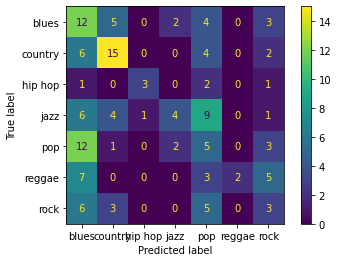

In [47]:
cm = confusion_matrix(gold_labels, predicted_labels, labels=['blues', 'country', 'hip hop', 'jazz', 'pop', 'reggae', 'rock'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['blues', 'country', 'hip hop', 'jazz', 'pop', 'reggae', 'rock'])
disp.plot()
plt.show()